In [1]:
import talos as ta

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\chances\plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [2]:
r = ta.Reporting('./hasil/3layer.csv')

In [3]:
# get the number of rounds in the Scan
r.rounds()

252

In [4]:
# get the highest result ('val_acc' by default)
r.high()

0.850966454

In [5]:
# get the highest result for any metric
r.high('acc')

0.978067887

In [8]:
# get the round with the best result
r.rounds2high('acc')

98

In [9]:
# get the best paramaters
r.best_params('acc')

array([[35, 0, 30, 60, 'lecun_uniform', 0.001, 20,
        "<class 'keras.optimizers.Adam'>",
        '<keras.layers.advanced_activations.LeakyReLU object at 0x000001FAF35EAD30>',
        32, 0],
       [20, 0, 30, 50, 'lecun_uniform', 0.001, 20,
        "<class 'keras.optimizers.Adam'>",
        '<function relu at 0x000002AB4FB24510>', 64, 1],
       [20, 0, 30, 70, 'he_uniform', 0.001, 20,
        "<class 'keras.optimizers.Adam'>",
        '<keras.layers.advanced_activations.LeakyReLU object at 0x000001FAF35EAD30>',
        64, 2],
       [25, 0, 30, 60, 'lecun_normal', 0.001, 20,
        "<class 'keras.optimizers.Adam'>",
        '<function selu at 0x000002069ABE51F8>', 256, 3],
       [25, 0, 30, 50, 'lecun_uniform', 0.001, 20,
        "<class 'keras.optimizers.Adam'>",
        '<keras.layers.advanced_activations.LeakyReLU object at 0x000001FAF35EAD30>',
        64, 4],
       [30, 0, 30, 70, 'he_normal', 0.001, 20,
        "<class 'keras.optimizers.Adam'>",
        '<function relu

In [10]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron     0.022280
second_neuron    0.057457
batch_size      -0.038439
epochs                NaN
epochs2               NaN
dropout               NaN
lr               0.721388
Name: loss, dtype: float64

In [11]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron    -0.040000
second_neuron    0.020432
batch_size       0.096224
epochs                NaN
epochs2               NaN
dropout               NaN
lr              -0.858099
Name: acc, dtype: float64

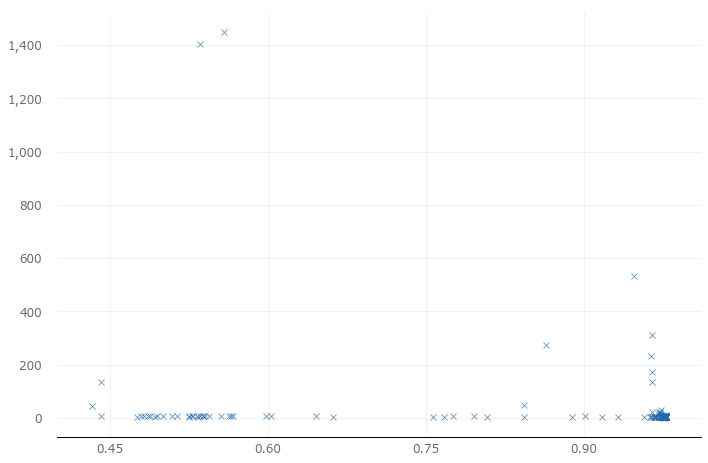

In [12]:
# a regression plot for two dimensions 
r.plot_regs('acc')

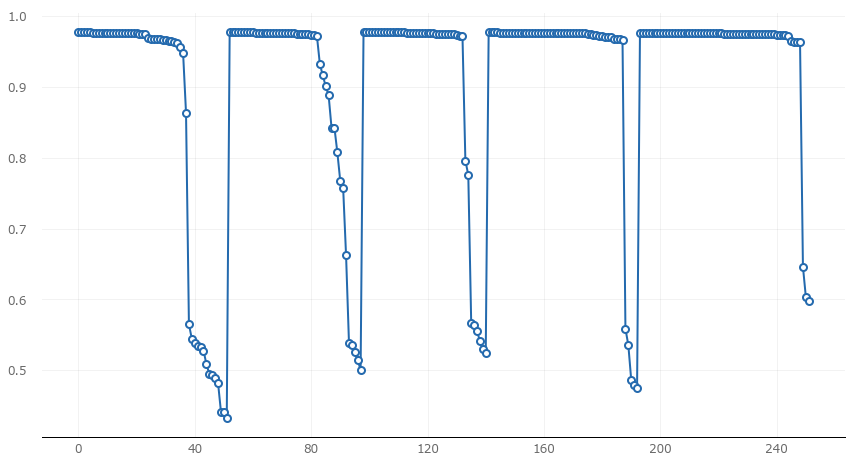

In [13]:
# line plot
r.plot_line('acc')

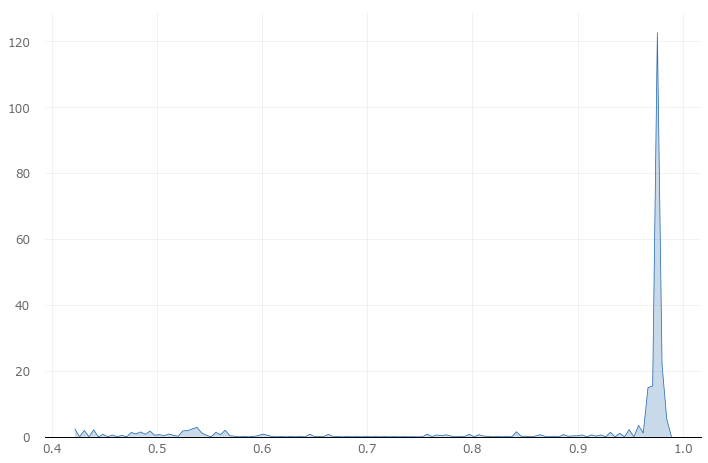

In [14]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

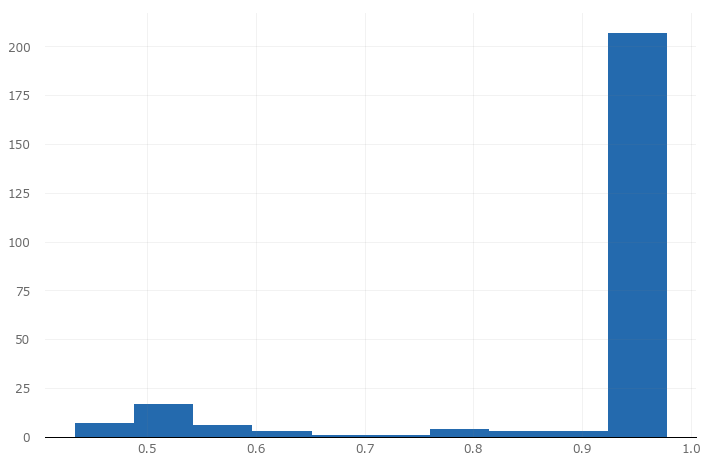

In [15]:

# a simple histogram
r.plot_hist('acc')

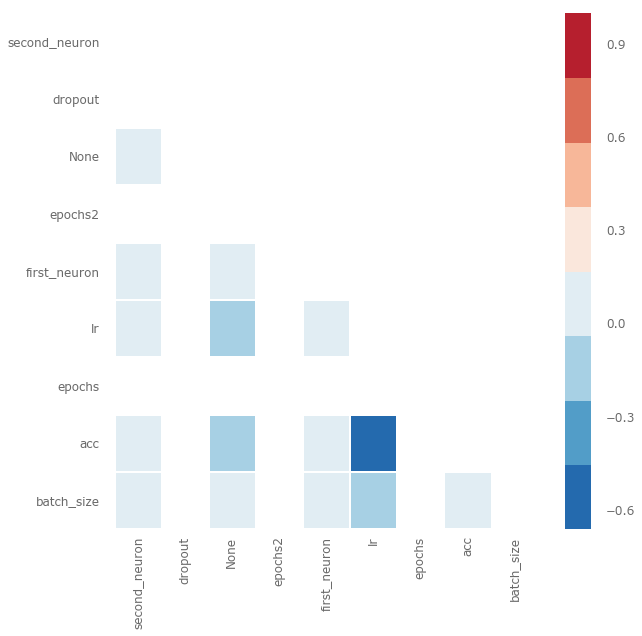

In [16]:
# heatmap correlation
r.plot_corr('acc')

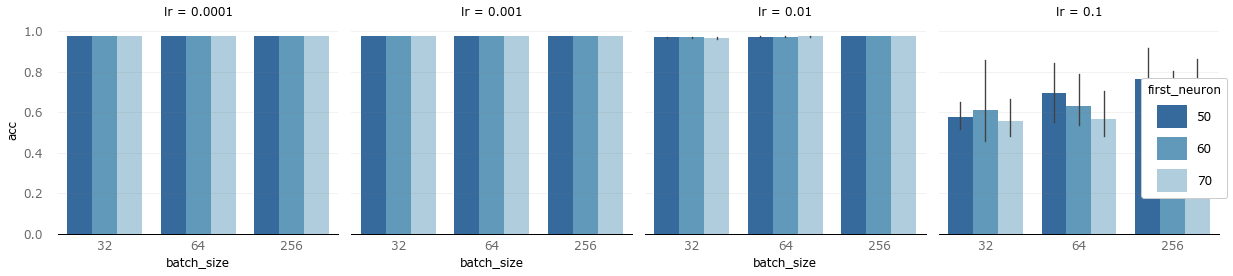

In [17]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


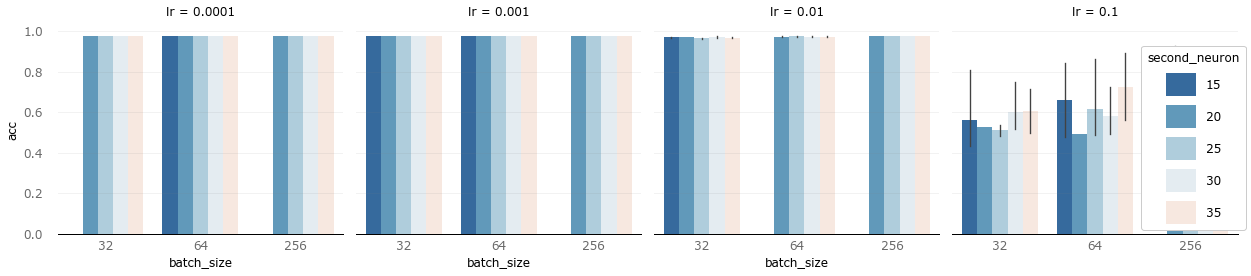

In [18]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'second_neuron', 'lr')

# Matrik Confusion

### Open Data

In [19]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [20]:
my_file =  '../CIDS-2018/10data2.npy'
train,test,y_train,y_test,ylabel_train, ylabel_test = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [21]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.models import load_model
# Keras items
from keras.activations import relu, elu
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [34]:
# create model for LR tidak bisa load model
input_dim = train.shape[1]
print(input_dim)

input_img = Input(shape=(input_dim,))
encoded = Dense(60, activation=LR, kernel_initializer='lecun_uniform')(input_img)
encoded = Dense(35, activation=LR, kernel_initializer='lecun_uniform')(encoded)
decoded = Dense(60, activation=LR, kernel_initializer='lecun_uniform')(encoded)
z = Dense(input_dim, activation='sigmoid', kernel_initializer='lecun_uniform')(decoded)
autoencoder = Model(input_img, z)
autoencoder.summary()



num_classes=15
#encoder is the model of the autoencoder slice in the middle 
encoder = Model(input_img, encoded)
# define new model encoder->Dense  10 neurons with soft max for classification 
out2 = Dense(num_classes, activation='softmax', kernel_initializer='lecun_uniform')(encoder.output)
dnn = Model(encoder.input,out2)
dnn.summary()

80
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 80)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_17 (Dense)             (None, 35)                2135      
_________________________________________________________________
dense_18 (Dense)             (None, 60)                2160      
_________________________________________________________________
dense_19 (Dense)             (None, 80)                4880      
Total params: 14,035
Trainable params: 14,035
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp

In [24]:
##loading dnn untuk data 
# load weights
filepath='./hasil/best3lr.hdf'
#dnn=load_model(filepath)
dnn.summary()
dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,ylabel_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_2 (Dense)              (None, 35)                2135      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                540       
Total params: 7,535
Trainable params: 7,535
Non-trainable params: 0
_________________________________________________________________
Created model and loaded weights from file
1619315/1619315 [==============================] - 62s 38us/step
loss 0.5227215099030644
acc 0.9521556954638595
acc: 95.22%


In [25]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_train, axis=1)

In [26]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
from sklearn.metrics import classification_report
outcomes = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
'DDOS attack-HOIC','DDOS attack-LOIC-UDP','DDoS attacks-LOIC-HTTP',
'DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-SlowHTTPTest','DoS attacks-Slowloris',
'FTP-BruteForce','Infilteration','SQL Injection','SSH-Bruteforce' ]
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

                          precision    recall  f1-score   support

                  Benign    0.94278   0.99955   0.97033    803025
                     Bot    0.99944   0.99978   0.99961     85842
        Brute Force -Web    0.00000   0.00000   0.00000       496
        Brute Force -XSS    0.00000   0.00000   0.00000       187
        DDOS attack-HOIC    0.99999   1.00000   1.00000    192098
    DDOS attack-LOIC-UDP    0.88751   0.99633   0.93878      1362
  DDoS attacks-LOIC-HTTP    0.99823   0.99877   0.99850    161447
   DoS attacks-GoldenEye    0.99415   0.99964   0.99689     25008
        DoS attacks-Hulk    0.99983   0.99978   0.99980    138459
DoS attacks-SlowHTTPTest    0.75321   0.50455   0.60430     41974
   DoS attacks-Slowloris    0.95382   0.99955   0.97615      6612
          FTP-BruteForce    0.71070   0.88056   0.78657     58055
           Infilteration    0.00000   0.00000   0.00000     48347
           SQL Injection    0.00000   0.00000   0.00000        71
         

Confusion matrix, without normalization
[[802660     48      0      0      1      3    150     33      5      2
     110      3      0      0     10]
 [    19  85823      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   464      0      0      0      0      0     32      0      0      0
       0      0      0      0      0]
 [   156      0      0      0      0      0     31      0      0      0
       0      0      0      0      0]
 [     0      0      0      0 192098      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0   1357      5      0      0      0
       0      0      0      0      0]
 [    29      0      0      0      0    169 161249      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0  24999      5      0
       4      0      0      0      0]
 [     0      0      0      0      0      0      0     31 138428      0
       0

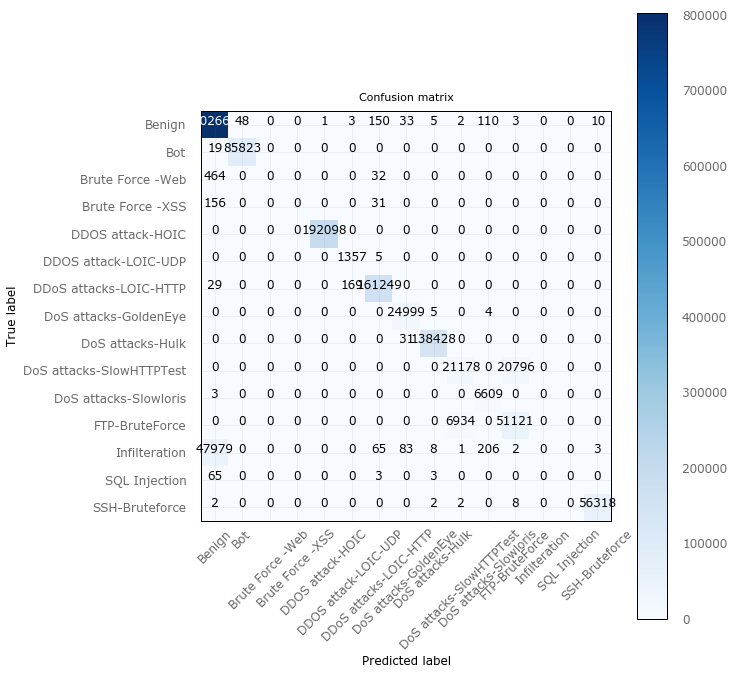

In [28]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes


results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.style.use('default')#reset style plt
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [29]:
#Data Test
result_test = dnn.evaluate(test,ylabel_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

404836/404836 [==============================] - 14s 35us/step
loss 0.5145071680151286
acc 0.9526870140007312
acc: 95.27%


In [30]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_test, axis=1)

                          precision    recall  f1-score   support

                  Benign    0.94377   0.99945   0.97081    201238
                     Bot    0.99921   0.99967   0.99944     21479
        Brute Force -Web    0.00000   0.00000   0.00000       115
        Brute Force -XSS    0.00000   0.00000   0.00000        43
        DDOS attack-HOIC    0.99998   1.00000   0.99999     48006
    DDOS attack-LOIC-UDP    0.85349   0.99728   0.91980       368
  DDoS attacks-LOIC-HTTP    0.99799   0.99814   0.99806     40219
   DoS attacks-GoldenEye    0.99302   0.99951   0.99626      6123
        DoS attacks-Hulk    0.99983   0.99968   0.99976     34758
DoS attacks-SlowHTTPTest    0.75491   0.50944   0.60835     10484
   DoS attacks-Slowloris    0.95319   0.99939   0.97574      1630
          FTP-BruteForce    0.71201   0.88015   0.78720     14452
           Infilteration    0.00000   0.00000   0.00000     11892
           SQL Injection    0.00000   0.00000   0.00000        16
         

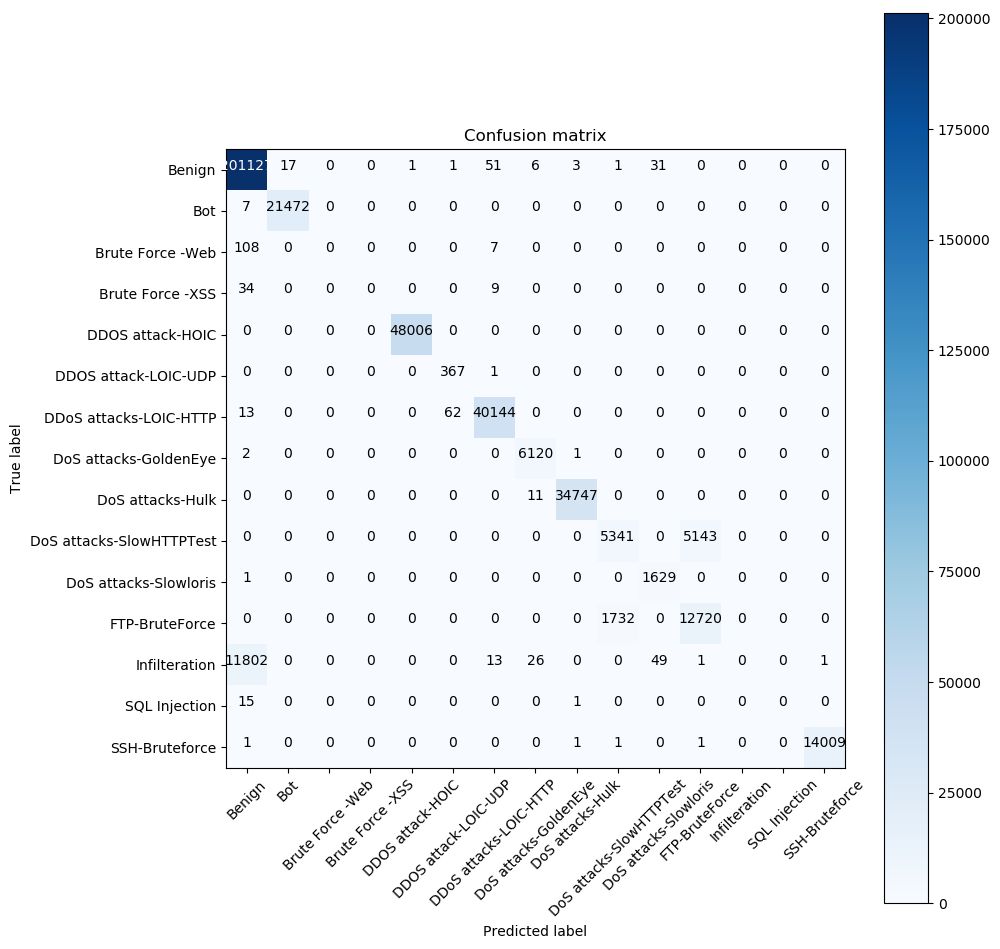

In [35]:
target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

results = confusion_matrix(true_lbls, pred_lbls)
plt.style.use('default')##reset style plt
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))